# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from plotnine import *


df = load_penguins()

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
pen_dumb = pd.get_dummies(df).dropna()

# Target
y = pen_dumb['bill_depth_mm']

# Features = everything except the target
X = pen_dumb.drop(columns=['bill_depth_mm'])

# Split properly on X and y (easier & safer than splitting the index)
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model3 = LinearRegression().fit(X_train_3, y_train)
yhat_3 = model3.predict(X_test_3)

print("R² (Model 3):", r2_score(y_test, yhat_3))
print("MSE (Model 3):", mean_squared_error(y_test, yhat_3))

predictions = pd.DataFrame({'model3pred': yhat_3, 'actual': y_test.values}, index=y_test.index)
predictions.head()
predictions


R² (Model 3): 0.8645513288883002
MSE (Model 3): 0.5623267797925907


,model3pred,actual
238,14.042787,14.4
117,18.812748,20.5
114,18.036756,20.7
43,19.574554,19.7
127,19.154285,18.3
...,...,...
174,14.242814,14.5
73,19.494485,18.9
76,18.093777,16.8
17,19.672476,20.7


In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

target = 'bill_depth_mm'
X = pen_dumb.drop(columns=[target])
y = pen_dumb[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)

print("KNN R²:", r2_score(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


param_grid = {
    'knn__n_neighbors': [3,5,7,9,11,15],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

gscv = GridSearchCV(knn_pipe, param_grid, cv = 5, scoring = 'r2')
gscv.fit(X_train, y_train)

print("\nBest KNN params:", gscv.best_params_)
print("CV Best R²:", gscv.best_score_)

y_pred_best = gscv.predict(X_test)
print("Test R² (best KNN):", r2_score(y_test, y_pred_best))
print("Test MSE (best KNN):", mean_squared_error(y_test, y_pred_best))

KNN R²: 0.8257498393681983
KNN MSE: 0.7234144927536235

Best KNN params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}
CV Best R²: 0.8254829562796935
Test R² (best KNN): 0.842949582935518
Test MSE (best KNN): 0.6520082815734995


In [6]:
from sklearn.tree import DecisionTreeRegressor
dt_pipe = Pipeline([
    ('dt', DecisionTreeRegressor(random_state=42))
])
dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("\nDecision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree R²: 0.7414293447740277
Decision Tree MSE: 1.0734782608695652


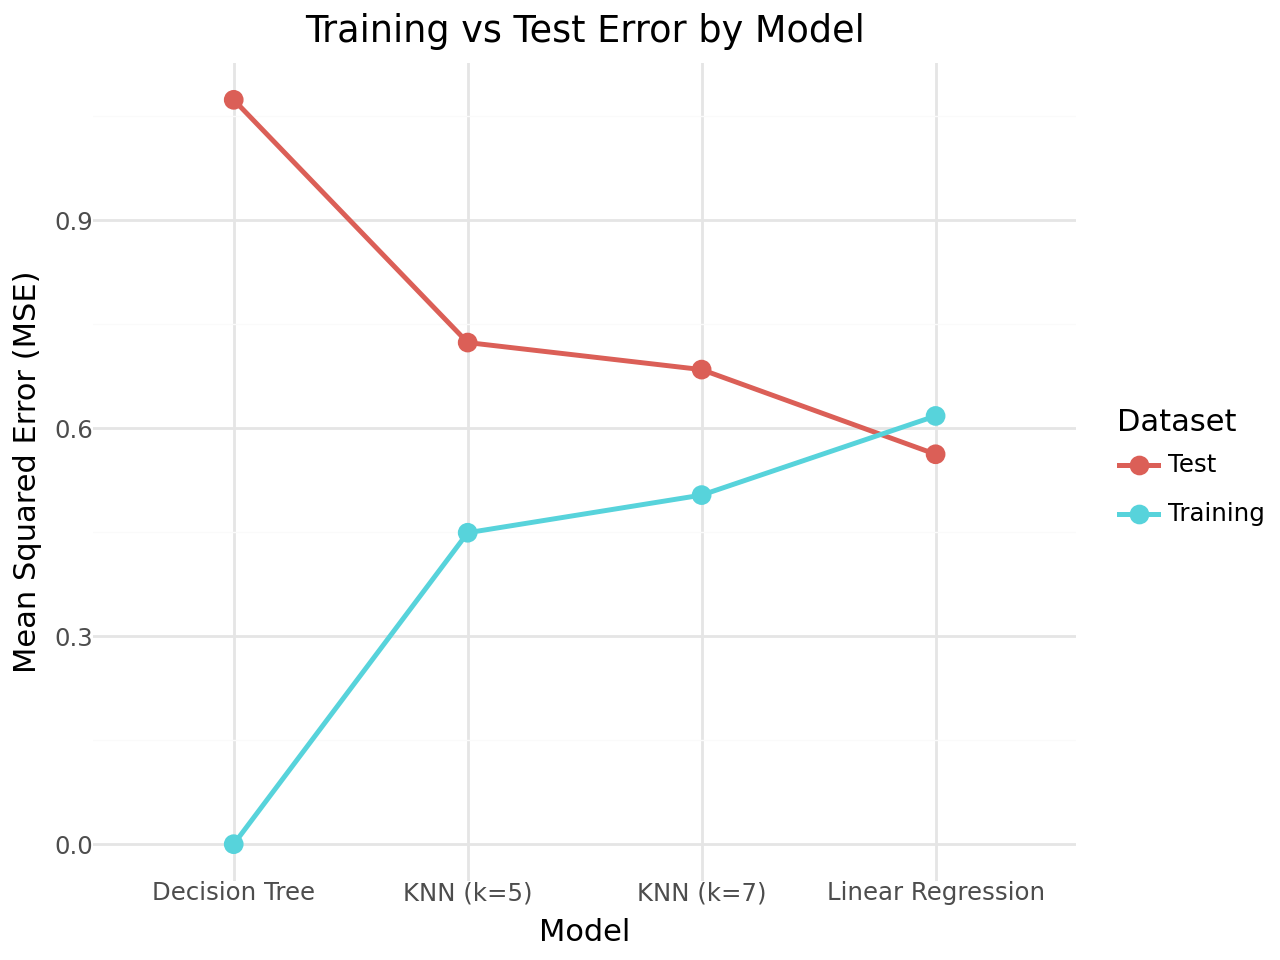

In [8]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal


models = {
    "Linear Regression": Pipeline([
        ("lin", LinearRegression())
    ]),
    "KNN (k=5)": Pipeline([
        ("scale", StandardScaler()),
        ("knn5", KNeighborsRegressor(n_neighbors=5))
    ]),
    "KNN (k=7)": Pipeline([
        ("scale", StandardScaler()),
        ("knn7", KNeighborsRegressor(n_neighbors=7))
    ]),
    "Decision Tree": Pipeline([
        ("dt", DecisionTreeRegressor(random_state=42))
    ])
}


records = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    yhat_train = pipe.predict(X_train)
    yhat_test  = pipe.predict(X_test)
    train_mse = mean_squared_error(y_train, yhat_train)
    test_mse  = mean_squared_error(y_test, yhat_test)
    records += [
        {"Model": name, "Dataset": "Training", "MSE": train_mse},
        {"Model": name, "Dataset": "Test", "MSE": test_mse}
    ]

df_plot = pd.DataFrame(records)


(
    ggplot(df_plot, aes(x="Model", y="MSE", group="Dataset", color="Dataset"))
    + geom_line(size=1)
    + geom_point(size=3)
    + labs(
        title="Training vs Test Error by Model",
        x="Model",
        y="Mean Squared Error (MSE)"
    )
    + theme_minimal()
)



In [9]:

best_row = df_plot[df_plot["Dataset"] == "Test"].sort_values("MSE").iloc[0]
print(f" Best Model: {best_row['Model']} — Test MSE = {best_row['MSE']:.4f}")

 Best Model: Linear Regression — Test MSE = 0.5623
